1. Import semua library yang dibutuhkan

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os


2. Cek versi Tensorflow

In [ ]:
print(tf.__version__)

3. import dataset **batu gunting kertas** 

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

4. extract zip

In [ ]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


5. mengecek isi hasil extract

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['rock', 'README_rpc-cv-images.txt', 'paper', 'scissors', 'rps-cv-images']

6. memecah dataset batu gunting kertas menjadi train dan validation

In [ ]:
baseDir = '/tmp/rockpaperscissors/'
rockDir = os.path.join(baseDir, 'rock')
paperDir = os.path.join(baseDir, 'paper')
scissorsDir = os.path.join(baseDir, 'scissors')

trainRockdir, valRockdir = train_test_split(os.listdir(rockDir), test_size =0.4)
trainPaperdir, valPaperdir = train_test_split(os.listdir(paperDir), test_size =0.4)
trainScissorsdir, valScissorsdir = train_test_split(os.listdir(scissorsDir), test_size =0.4)



6. membuat folder data train dan validasi

In [ ]:
os.makedirs('/tmp/train/paper')
os.makedirs('/tmp/train/rock')
os.makedirs('/tmp/train/scissors')
os.makedirs('/tmp/val/paper')
os.makedirs('/tmp/val/rock')
os.makedirs('/tmp/val/scissors')

7. memindahkan data train dan validasi

In [ ]:
import numpy as np
import shutil
arr = trainRockdir
for x in arr:
  shutil.copy('/tmp/rockpaperscissors/rock/' + x, '/tmp/train/rock')
  
arr1 = trainPaperdir
for y in arr1:
  shutil.copy('/tmp/rockpaperscissors/paper/' + y, '/tmp/train/paper')

arr2 = trainScissorsdir
for z in arr2:
  shutil.copy('/tmp/rockpaperscissors/scissors/' + z, '/tmp/train/scissors')

  ars = valRockdir
for a in ars:
  shutil.copy('/tmp/rockpaperscissors/rock/' + a, '/tmp/val/rock')
  
ars1 = valPaperdir
for b in ars1:
  shutil.copy('/tmp/rockpaperscissors/paper/' + b, '/tmp/val/paper')

ars2 = valScissorsdir
for c in ars2:
  shutil.copy('/tmp/rockpaperscissors/scissors/' + c, '/tmp/val/scissors')


testingDir = '/tmp/'
train_dir = os.path.join(testingDir, 'train')
validation_dir = os.path.join(testingDir, 'val')


8. augmentasi gambar

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap')
                

9. mepersiapkan objek

In [ ]:

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(100, 150), 
        shuffle=True,)
 
validation_generator = train_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 150),) 

Found 1312 images belonging to 3 classes.
Found 879 images belonging to 3 classes.


10. membangun cnn

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

11. memanggil fungsi compile

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

12. testing

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=32,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=8,
      verbose=2)

Epoch 1/20
32/32 - 20s - loss: 1.0512 - accuracy: 0.4883 - val_loss: 0.9351 - val_accuracy: 0.5625
Epoch 2/20
32/32 - 20s - loss: 0.6260 - accuracy: 0.7734 - val_loss: 0.4371 - val_accuracy: 0.8477
Epoch 3/20
32/32 - 20s - loss: 0.2803 - accuracy: 0.9199 - val_loss: 0.2428 - val_accuracy: 0.9375
Epoch 4/20
32/32 - 20s - loss: 0.1451 - accuracy: 0.9521 - val_loss: 0.1422 - val_accuracy: 0.9609
Epoch 5/20
32/32 - 20s - loss: 0.1285 - accuracy: 0.9600 - val_loss: 0.2185 - val_accuracy: 0.9531
Epoch 6/20
32/32 - 20s - loss: 0.0685 - accuracy: 0.9746 - val_loss: 0.1218 - val_accuracy: 0.9609
Epoch 7/20
32/32 - 20s - loss: 0.0907 - accuracy: 0.9756 - val_loss: 0.0907 - val_accuracy: 0.9766
Epoch 8/20
32/32 - 20s - loss: 0.0567 - accuracy: 0.9805 - val_loss: 0.1513 - val_accuracy: 0.9492
Epoch 9/20
32/32 - 20s - loss: 0.0530 - accuracy: 0.9854 - val_loss: 0.0429 - val_accuracy: 0.9883
Epoch 10/20
32/32 - 20s - loss: 0.0473 - accuracy: 0.9863 - val_loss: 0.0674 - val_accuracy: 0.9766
Epoch 11/

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving 0NDYNEoDui7o64gU.png to 0NDYNEoDui7o64gU.png
0NDYNEoDui7o64gU.png
rock


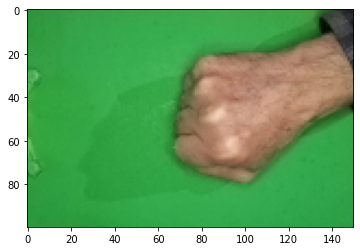

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(100,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    if classes[0][0] == 1:
        print('paper')
    elif classes[0][1] == 1:
        print('rock')
    elif classes[0][2] == 1:
        print('scissors')